# Linear and Polynomial regression

In this notebook, we will demonstrate how to:

1. Carry out simple descriptive analytics
1. Fit simple and multiple regression models
1. Scale our data
1. Use pipelines
1. Generate polynomial features for polynomial regression

In [19]:
import numpy as np
import pandas as pd
import seaborn as sns

## Load dataset

In [20]:
from sklearn import datasets
dataset = datasets.load_diabetes(as_frame = True, scaled = False)
print(dataset['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [24]:
df = dataset['frame']
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,59.0,2.0,32.1,101.00,157.0,93.2,38.0,4.00,4.8598,87.0,151.0
1,48.0,1.0,21.6,87.00,183.0,103.2,70.0,3.00,3.8918,69.0,75.0
2,72.0,2.0,30.5,93.00,156.0,93.6,41.0,4.00,4.6728,85.0,141.0
3,24.0,1.0,25.3,84.00,198.0,131.4,40.0,5.00,4.8903,89.0,206.0
4,50.0,1.0,23.0,101.00,192.0,125.4,52.0,4.00,4.2905,80.0,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,60.0,2.0,28.2,112.00,185.0,113.8,42.0,4.00,4.9836,93.0,178.0
438,47.0,2.0,24.9,75.00,225.0,166.0,42.0,5.00,4.4427,102.0,104.0
439,60.0,2.0,24.9,99.67,162.0,106.6,43.0,3.77,4.1271,95.0,132.0
440,36.0,1.0,30.0,95.00,201.0,125.2,42.0,4.79,5.1299,85.0,220.0


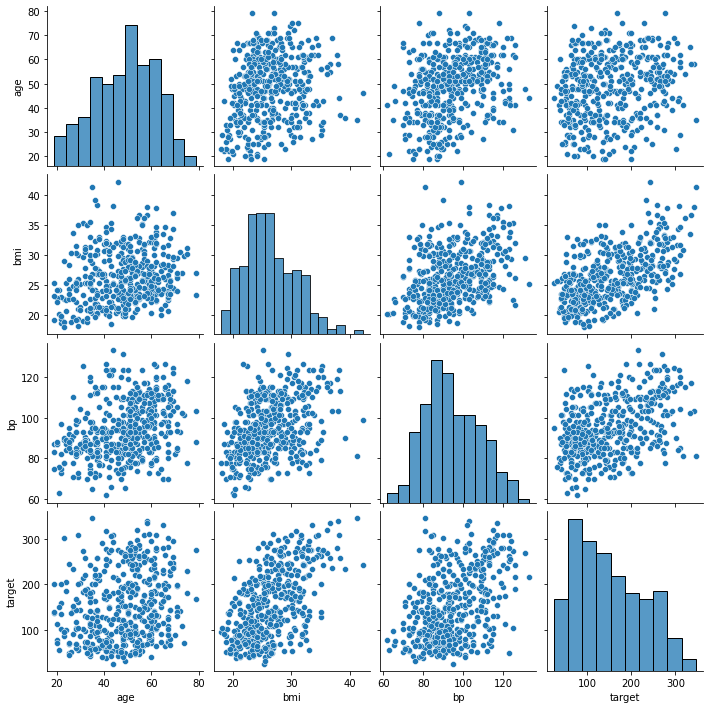

In [27]:
sns.pairplot(df[['age', 'bmi', 'bp', 'target']])

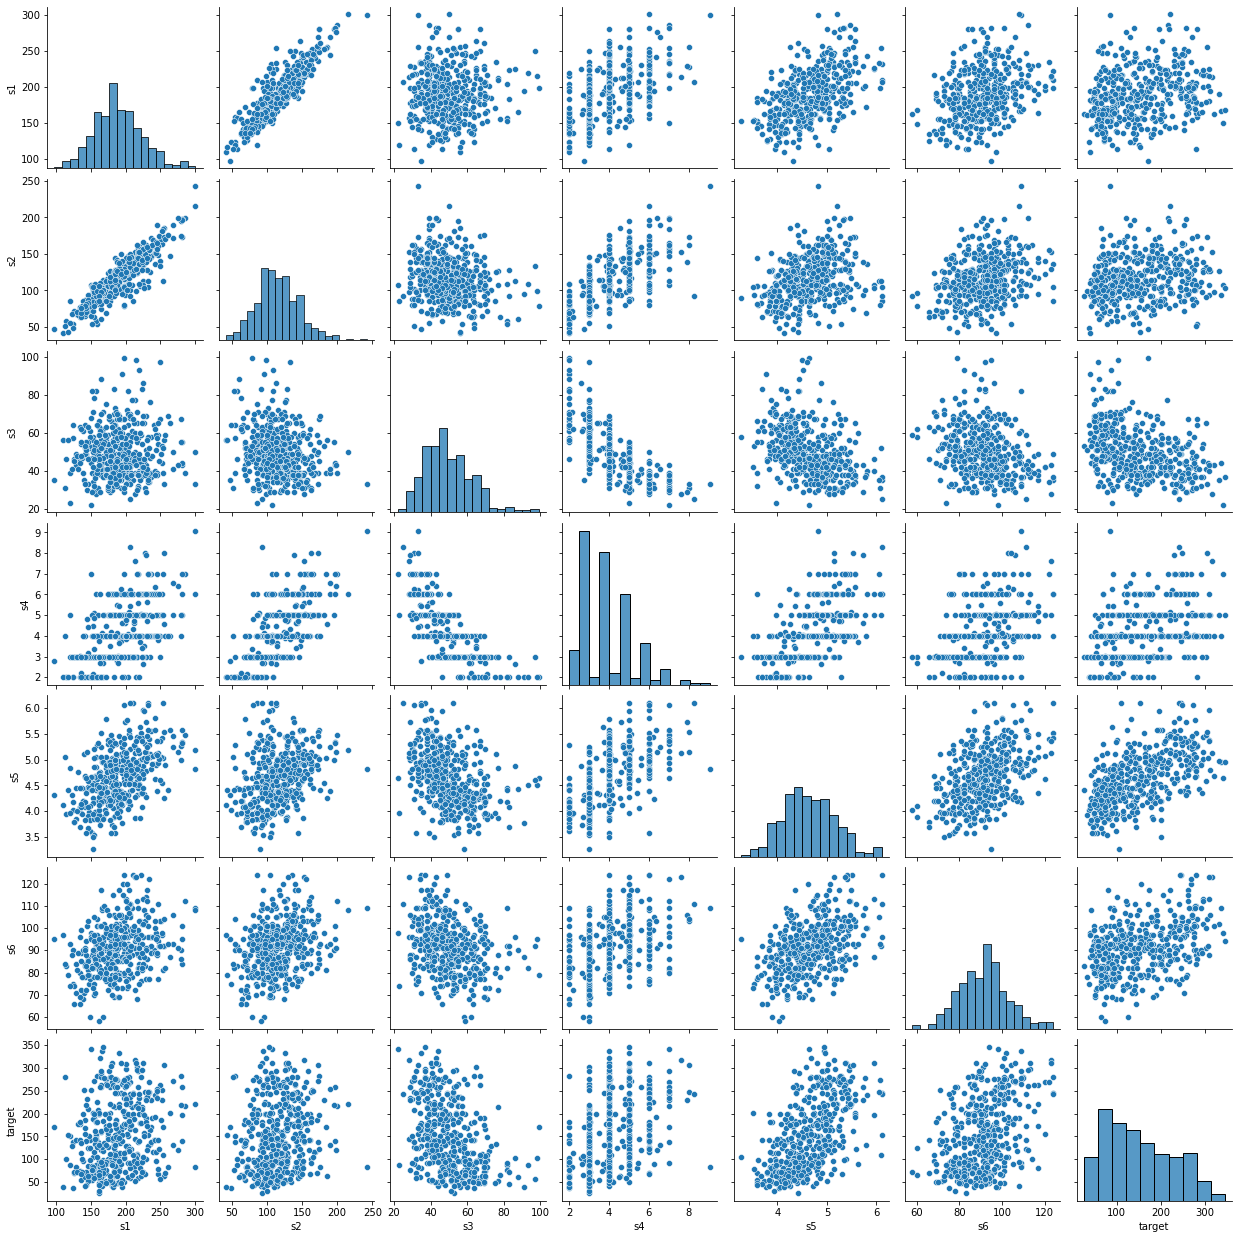

In [28]:
sns.pairplot(df[['s1', 's2', 's3', 's4', 's5', 's6', 'target']])

In [79]:
df.corr().style.background_gradient(cmap='bwr_r', vmin = -1, vmax = 1)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
age,1.000000,0.173737,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731,0.187889
sex,0.173737,1.000000,0.088161,0.241010,0.035277,0.142637,-0.379090,0.332115,0.149916,0.208133,0.043062
bmi,0.185085,0.088161,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680,0.586450
bp,0.335428,0.241010,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430,0.441482
s1,0.260061,0.035277,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717,0.212022
s2,0.219243,0.142637,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600,0.174054
s3,-0.075181,-0.379090,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
s4,0.203841,0.332115,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212,0.430453
s5,0.270774,0.149916,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669,0.565883
s6,0.301731,0.208133,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000,0.382483


## Simple linear regression

Since ```bmi``` has the largest correlation with our target, let's fit a simple linear regression model using ```bmi``` as our feature/input/independent variable.

The target has already been specified for us: ```target```.

In [31]:
from sklearn.model_selection import train_test_split

X = df[['bmi']]
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=2022)

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

reg = LinearRegression()
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)
mean_squared_error(y_test, y_pred)

3818.284166376714

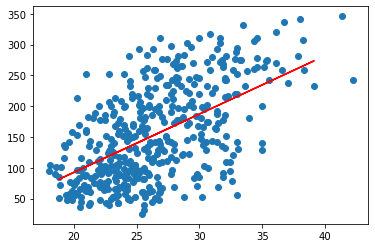

In [36]:
from matplotlib import pyplot as plt

plt.scatter(X,y)
plt.plot(X_test, y_pred, c = 'red')

Seaborn's ```pairplot``` actually includes and option to automatically compute simple linear regression for all variables.

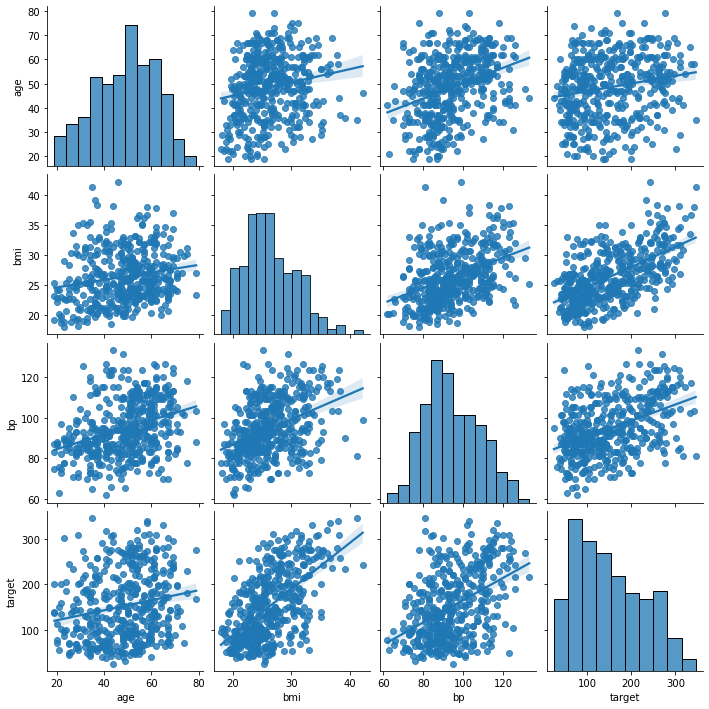

In [43]:
sns.pairplot(df[['age', 'bmi', 'bp', 'target']], kind = 'reg')

## Multiple Linear Regression

Let's add a few more variables to see if the model improves.

By keep the random state the same when we do our train-test split, we can ensure that we're getting the same splits as before, so we can compare the MSE.

In [66]:
X = df[['bmi', 'bp', 's4', 's5']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=2022)

In [67]:
reg = LinearRegression()
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)
mean_squared_error(y_test, y_pred)

3145.008350852843

Let's take a look at the regression coefficients:

In [68]:
reg.coef_

array([ 5.821565  ,  1.09410549,  0.06458937, 46.9873409 ])

In [69]:
pd.Series(index = X.columns, data = reg.coef_)

bmi     5.821565
bp      1.094105
s4      0.064589
s5     46.987341
dtype: float64

However, we can't quite compare the importance of different variables because we didn't normalize our data.

## Scaling our data

We can use sklearn's ```StandardScaler``` to scale our data first.

```StandardScaler``` is an example of a pre-processing step. 

Unlike models, which have ```fit``` and ```predict```, pre-processing steps have ```fit``` and ```transform```.

In [70]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

scaler.transform(X_train)

array([[-1.75717865, -0.54721802, -1.10223264, -1.71103367],
       [ 0.55050443,  1.33092154, -0.0459353 ,  1.26906393],
       [ 0.93138416, -0.40274575, -0.84014383, -0.53456187],
       ...,
       [-1.6451552 , -0.1138012 , -0.84014383, -0.3425918 ],
       [-0.81618167, -0.1138012 , -0.84014383, -2.12117802],
       [-1.84679741, -1.55852394, -0.0459353 , -0.23175771]])

In [71]:
reg = LinearRegression()
reg.fit(scaler.transform(X_train), y_train)

y_pred = reg.predict(scaler.transform(X_test))
mean_squared_error(y_test, y_pred)

3145.0083508528423

In [72]:
reg.coef_

array([25.98368898, 15.14623473,  0.08132546, 24.20714824])

In [73]:
pd.Series(index = X.columns, data = reg.coef_)

bmi    25.983689
bp     15.146235
s4      0.081325
s5     24.207148
dtype: float64

Now we see that ```bmi``` is the most important variable, followed by ```s5``` and ```bp```, at least among the ones we included.

Although ```s4``` had high correlations with the target, it has a very small regression coefficient. This means that it's relationship to the target is mostly captured by the other variables.

(Try this again, but without the ```s5``` variable. You should observe that ```s4```'s coefficient increases.)

## Pipelines

It can get tedious to keep calling ```StandardScaler``` before using our model.

Sklearn's pipelines help us to chain these steps together easily.

A pipeline can contain any number of pre-processing steps (like ```StandardScaler```) followed by a model at the end.

A pipeline will have ```fit``` and ```predict``` methods, just like a model. But behind the scenes, it is actually calling ```fit``` and ```transform``` from all the pre-processing steps, before calling the model's ```fit``` and ```predict```.

In [74]:
from sklearn.pipeline import make_pipeline

pipe = make_pipeline(StandardScaler(), LinearRegression())

In [75]:
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

mean_squared_error(y_test, y_pred)

3145.0083508528423

## Polynomial features

As we saw, we can do polynomial regression by adding extra features representing the powers of our variables, and then doing multiple regression.

Sklearn has a ```PolynomialFeatures``` pre-processor that helps us generate these features automatically.

In [77]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 2)

X_train_poly = poly.fit_transform(X_train)
X_train_poly.shape

(296, 15)

If X is a dataframe (and not just a numpy array), ```PolynomialFeatures``` stores the variables names from X so that you can extract names for all the output features as well.

In [81]:
poly.get_feature_names_out()

array(['1', 'bmi', 'bp', 's4', 's5', 'bmi^2', 'bmi bp', 'bmi s4',
       'bmi s5', 'bp^2', 'bp s4', 'bp s5', 's4^2', 's4 s5', 's5^2'],
      dtype=object)

In [83]:
pd.DataFrame(columns = poly.get_feature_names_out(), data = X_train_poly)

,1,bmi,bp,s4,s5,bmi^2,bmi bp,bmi s4,bmi s5,bp^2,bp s4,bp s5,s4^2,s4 s5,s5^2
0,1.0,18.5,87.00,2.67,3.7377,342.25,1609.500,49.395,69.14745,7569.0000,232.2900,325.179900,7.1289,9.979659,13.970401
1,1.0,28.8,113.00,4.00,5.2730,829.44,3254.400,115.200,151.86240,12769.0000,452.0000,595.849000,16.0000,21.092000,27.804529
2,1.0,30.5,89.00,3.00,4.3438,930.25,2714.500,91.500,132.48590,7921.0000,267.0000,386.598200,9.0000,13.031400,18.868598
3,1.0,24.5,90.00,7.00,5.2983,600.25,2205.000,171.500,129.80835,8100.0000,630.0000,476.847000,49.0000,37.088100,28.071983
4,1.0,21.4,83.00,3.00,3.8501,457.96,1776.200,64.200,82.39214,6889.0000,249.0000,319.558300,9.0000,11.550300,14.823270
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,1.0,28.9,87.33,6.24,5.4337,835.21,2523.837,180.336,157.03393,7626.5289,544.9392,474.525021,38.9376,33.906288,29.525096
292,1.0,28.3,87.00,4.00,4.3820,800.89,2462.100,113.200,124.01060,7569.0000,348.0000,381.234000,16.0000,17.528000,19.201924
293,1.0,19.0,93.00,3.00,4.4427,361.00,1767.000,57.000,84.41130,8649.0000,279.0000,413.171100,9.0000,13.328100,19.737583
294,1.0,22.7,93.00,3.00,3.5264,515.29,2111.100,68.100,80.04928,8649.0000,279.0000,327.955200,9.0000,10.579200,12.435497


Let's fit a degree 2 model using the same X, and see what the coefficients are.

It's usually recommended to scale _after_ generating polynomial features.

In [84]:
pipe = make_pipeline(PolynomialFeatures(degree = 2), StandardScaler(), LinearRegression())

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)
mean_squared_error(y_test, y_pred)

3228.312544623159

In [88]:
pipe.named_steps

{'polynomialfeatures': PolynomialFeatures(),
 'standardscaler': StandardScaler(),
 'linearregression': LinearRegression()}

In [91]:
coefs = pipe.named_steps['linearregression'].coef_
coefs

array([  0.        , -37.53999231, -91.16320369,  36.21592584,
        18.92512472,  35.02058999,  82.75484141, -12.35221683,
       -27.13068348, -29.17000818, -32.82305022, 152.74260151,
       -12.49824834,  18.54463895, -64.8016917 ])

In [92]:
features = pipe.named_steps['polynomialfeatures'].get_feature_names_out()
features

array(['1', 'bmi', 'bp', 's4', 's5', 'bmi^2', 'bmi bp', 'bmi s4',
       'bmi s5', 'bp^2', 'bp s4', 'bp s5', 's4^2', 's4 s5', 's5^2'],
      dtype=object)

In [94]:
pd.Series(index = features,data = coefs).sort_values(ascending = False)

bp s5     152.742602
bmi bp     82.754841
s4         36.215926
bmi^2      35.020590
s5         18.925125
s4 s5      18.544639
1           0.000000
bmi s4    -12.352217
s4^2      -12.498248
bmi s5    -27.130683
bp^2      -29.170008
bp s4     -32.823050
bmi       -37.539992
s5^2      -64.801692
bp        -91.163204
dtype: float64

We're getting coefficients everywhere! But keep in mind we are likely overfitting (notice how the test MSE increased!)